In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport


<b><h1>We are going to look through and analyze the data set trying to figure out what are the features that affect the price the most.</h1></b>
<br><b>Chapter 1: Host Reputation and Superhost Status:</b> How does the host's reputation or Superhost status impact pricing?
<br><b>Chapter 2: Location Analysis:</b> How does the location influence the price? Are certain areas more desirable or expensive?
<br><b>Chapter 3: Property Type Analysis:</b> What impact does the type of property have on price? Are certain property types more expensive?
<br><b>Chapter 4: Amenities and Features:</b> Which amenities/features are associated with higher-priced listings? Do specific amenities significantly affect price?
<br><b>Chapter 5: Property Size and Capacity:</b> How does the size and capacity of the property correlate with price?
<br><b>Chapter 6: Seasonality and Demand:</b> Does the time of year or demand affect pricing? Are there any trends in pricing fluctuations?
<br><b>Chapter 7: Listing Description and Photos:</b> How do the quality of listing descriptions and photos influence price?
<br><b>Chapter 8: Competitor Analysis:</b> How does the price of the listing compare to similar listings in the area?
<br><b>Chapter 9: External Factors:</b> Are there any external factors like events or local attractions that affect pricing?
<br><b>Chapter 10: Booking Dynamics:</b> Does the length of the booking or booking lead time affect price?

In [365]:
df=pd.read_csv('Downloads/listings.csv')

In [366]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [367]:
df.shape

(3818, 92)

We are going to look at how different details about the host might influence the price of listings

In [368]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

<b>We are going to look how the 'property_type','room_type' and 'bedrooms' affect the price. We are going to clean and only select the relevant fields for our study

<h1>Cleaning the data</h1>
By getting rid of the features not needed and filling the empty spaces


In [369]:
df.shape

(3818, 92)

In [370]:
df['price']=df['price'].str.replace('$','').str.replace('.','').str.replace(',','').astype(float)

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [372]:
df.isna().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

<h1>Chapter 1: Host Reputation and Superhost Status</h1>
Checking what details about the host influence the price in any way and what is their impact.

In [373]:
host_columns = [
    'host_id', 'host_name', 'host_since', 'host_location', 'host_about',
    'host_response_time', 'host_response_rate', 'host_acceptance_rate',
    'host_is_superhost', 'host_total_listings_count',
    'host_verifications', 'host_has_profile_pic', 'host_identity_verified','price'
]

host = df[host_columns].copy()


In [374]:
#host.profile_report()

In [375]:
host.drop_duplicates(inplace=True)
host.set_index('host_id',inplace=True)

In [376]:
host.dropna(thresh=3,inplace=True)

In [377]:
host.isna().sum()

host_name                      0
host_since                     0
host_location                  6
host_about                   826
host_response_time           519
host_response_rate           519
host_acceptance_rate         764
host_is_superhost              0
host_total_listings_count      0
host_verifications             0
host_has_profile_pic           0
host_identity_verified         0
price                          0
dtype: int64

In [378]:
host.dropna(subset='host_acceptance_rate',inplace=True)

<Axes: xlabel='host_is_superhost'>

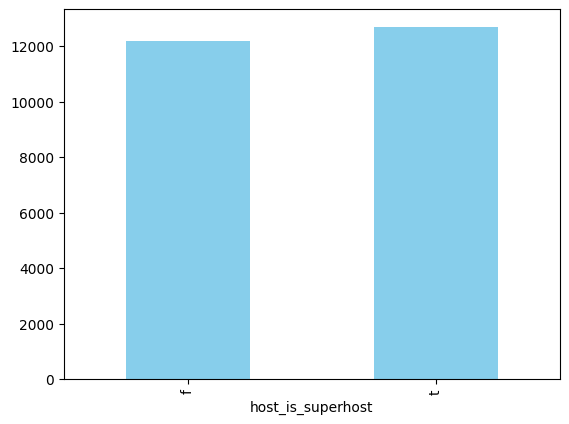

In [379]:
mean_price_by_superhost = host.groupby('host_is_superhost')['price'].mean()
mean_price_by_superhost.plot(kind='bar', color='skyblue')

In [380]:
host.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2750 entries, 956883 to 46566046
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_name                  2750 non-null   object 
 1   host_since                 2750 non-null   object 
 2   host_location              2747 non-null   object 
 3   host_about                 2198 non-null   object 
 4   host_response_time         2732 non-null   object 
 5   host_response_rate         2732 non-null   object 
 6   host_acceptance_rate       2750 non-null   object 
 7   host_is_superhost          2750 non-null   object 
 8   host_total_listings_count  2750 non-null   float64
 9   host_verifications         2750 non-null   object 
 10  host_has_profile_pic       2750 non-null   object 
 11  host_identity_verified     2750 non-null   object 
 12  price                      2750 non-null   float64
dtypes: float64(2), object(11)
memory usage: 300.

In [381]:
host['host_since']=pd.to_datetime(host['host_since'])

In [382]:
host.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2750 entries, 956883 to 46566046
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   host_name                  2750 non-null   object        
 1   host_since                 2750 non-null   datetime64[ns]
 2   host_location              2747 non-null   object        
 3   host_about                 2198 non-null   object        
 4   host_response_time         2732 non-null   object        
 5   host_response_rate         2732 non-null   object        
 6   host_acceptance_rate       2750 non-null   object        
 7   host_is_superhost          2750 non-null   object        
 8   host_total_listings_count  2750 non-null   float64       
 9   host_verifications         2750 non-null   object        
 10  host_has_profile_pic       2750 non-null   object        
 11  host_identity_verified     2750 non-null   object        
 12  pr

<Axes: xlabel='host_since'>

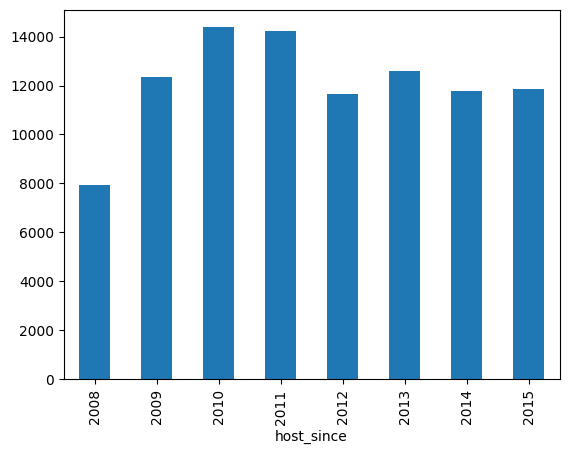

In [383]:
host.groupby(host['host_since'].dt.year)['price'].mean().plot(kind='bar')

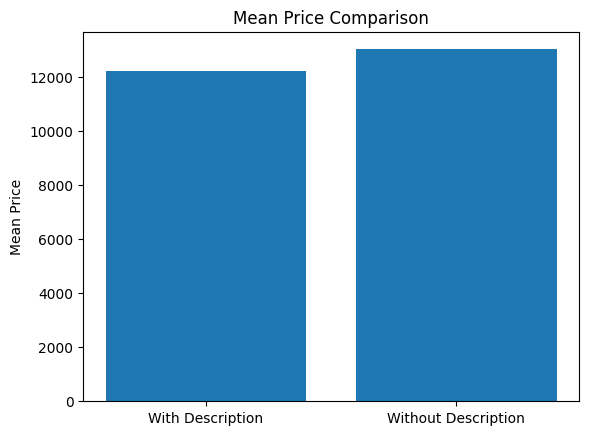

In [384]:
import matplotlib.pyplot as plt

# Assuming 'host' is your DataFrame

# Filter hosts based on the length of 'host_about'
hosts_with_description = host[host['host_about'].str.split().str.len() > 10]
hosts_without_description = host[host['host_about'].str.split().str.len() <= 10]

# Calculate the mean price for each group
mean_price_with_description = hosts_with_description['price'].mean()
mean_price_without_description = hosts_without_description['price'].mean()

# Plot the mean prices
plt.bar(['With Description', 'Without Description'], [mean_price_with_description, mean_price_without_description])
plt.title('Mean Price Comparison')
plt.ylabel('Mean Price')
plt.show()


In [385]:
# Assuming 'host' is your DataFrame

# Calculate the total mean price
total_mean_price = host['price'].mean()

# Calculate the mean price for each category of 'host_is_superhost' and whether they have a 'host_about' or not
mean_price_by_superhost_with_about = host[host['host_about'].notnull()]['price'].mean()
mean_price_by_superhost_without_about = host[host['host_about'].isnull()]['price'].mean()

# Calculate the percentages
price_percentages_with_about = (mean_price_by_superhost_with_about / total_mean_price) * 100
price_percentages_without_about = (mean_price_by_superhost_without_about / total_mean_price) * 100

# Display the percentages
print("With 'host_about':")
print(price_percentages_with_about)
print("\nWithout 'host_about':")
print(price_percentages_without_about)

price_percentages_without_about-price_percentages_with_about

With 'host_about':
99.70762609022519

Without 'host_about':
101.16419901029903


1.4565729200738389

<Axes: xlabel='host_response_time'>

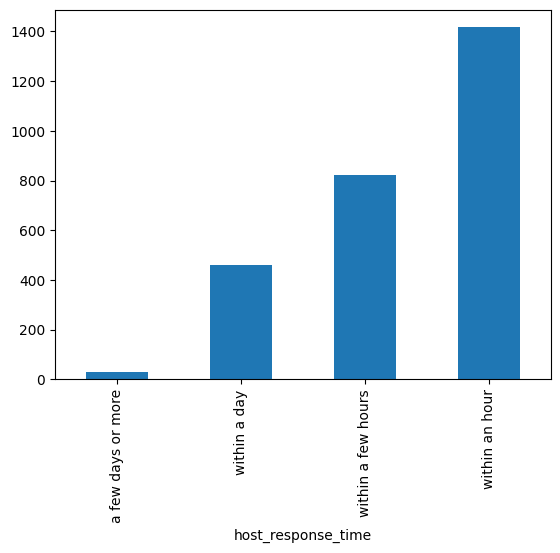

In [386]:
host.groupby('host_response_time')['price'].count().plot(kind='bar')

<Axes: xlabel='host_response_time'>

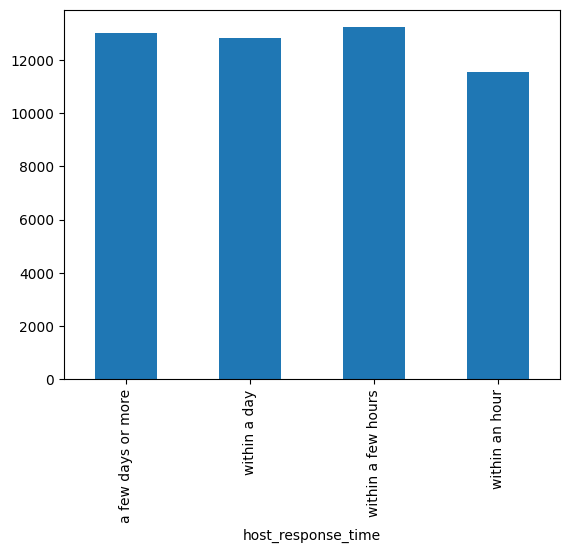

In [387]:
host.groupby('host_response_time')['price'].mean().plot(kind='bar')

host_is_superhost
f    12185.714286
t    12681.735160
Name: price, dtype: float64


<Axes: xlabel='host_is_superhost'>

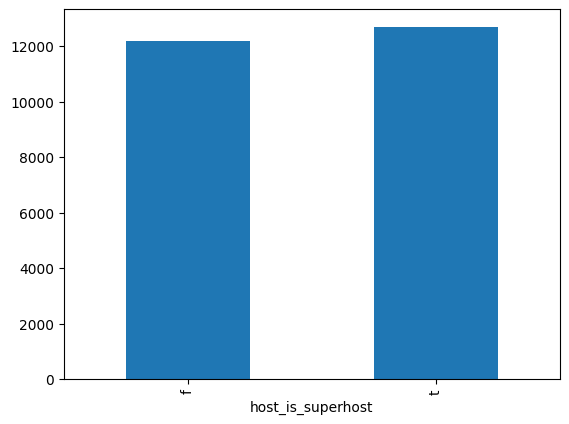

In [388]:
print(host.groupby('host_is_superhost')['price'].mean())
host.groupby('host_is_superhost')['price'].mean().plot(kind='bar')

In [389]:
# Assuming 'host' is your DataFrame

# Separate hosts with and without a 'host_about'
host_with_about = host[host['host_about'].notnull()]
host_without_about = host[host['host_about'].isnull()]

# Sample the same number of rows from each group to create balanced subsets
sample_size = min(len(host_with_about), len(host_without_about))
host_with_about_balanced = host_with_about.sample(n=sample_size, random_state=42)
host_without_about_balanced = host_without_about.sample(n=sample_size, random_state=42)

# Calculate the total mean price
total_mean_price = host['price'].mean()

# Calculate the mean price for hosts with and without a 'host_about' in the balanced subsets
mean_price_with_about_balanced = host_with_about_balanced['price'].mean()
mean_price_without_about_balanced = host_without_about_balanced['price'].mean()

# Calculate the percentages
price_percentage_with_about_balanced = (mean_price_with_about_balanced / total_mean_price) * 100
price_percentage_without_about_balanced = (mean_price_without_about_balanced / total_mean_price) * 100

# Display the percentages
print("With 'host_about' (Balanced): {:.2f}%".format(price_percentage_with_about_balanced))
print("Without 'host_about' (Balanced): {:.2f}%".format(price_percentage_without_about_balanced))


With 'host_about' (Balanced): 97.69%
Without 'host_about' (Balanced): 101.16%


In [390]:
# Assuming 'host' is your DataFrame

# Calculate the total mean price
total_mean_price = host['price'].mean()

# Calculate the mean price for hosts with and without a 'host_about'
mean_price_with_about = host[host['host_about'].notnull()]['price'].mean()
mean_price_without_about = host[host['host_about'].isnull()]['price'].mean()

# Calculate the percentages
price_percentage_with_about = (mean_price_with_about / total_mean_price) * 100
price_percentage_without_about = (mean_price_without_about / total_mean_price) * 100

# Display the percentages
print("With 'host_about': {:.2f}%".format(price_percentage_with_about))
print("Without 'host_about': {:.2f}%".format(price_percentage_without_about))


With 'host_about': 99.71%
Without 'host_about': 101.16%


In [391]:
for col in host.columns:
    print(host[col].value_counts())
    

host_name
Jordan     36
Michael    31
Melissa    27
Lisa       26
Andrew     26
           ..
Wade        1
Shellie     1
Julio       1
Gracie      1
Glen        1
Name: count, Length: 1187, dtype: int64
host_since
2013-02-04    29
2013-08-30    27
2011-03-08    25
2010-01-27    22
2012-07-27    18
              ..
2012-04-11     1
2013-04-30     1
2010-08-05     1
2011-11-06     1
2011-03-27     1
Name: count, Length: 1173, dtype: int64
host_location
Seattle, Washington, United States            2366
US                                             159
Spokane, Washington, United States              31
Kent, Washington, United States                 23
Bellevue, Washington, United States             10
                                              ... 
Greenwood Village, Colorado, United States       1
Edmonds, Washington, United States               1
West Seattle, Washington                         1
Vashon Island, Seattle, WA                       1
Arlington, Massachusetts, United S

<Axes: xlabel='host_response_rate'>

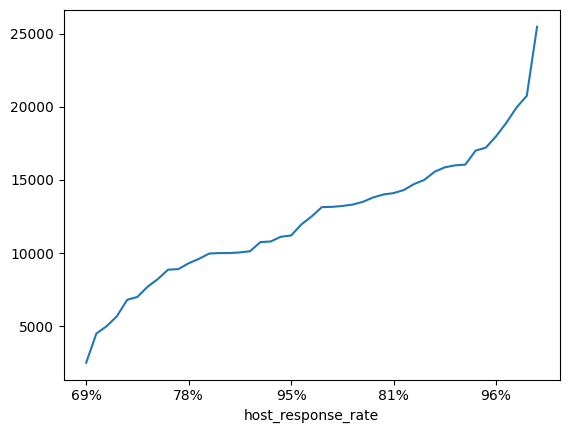

In [392]:
host.groupby(host['host_response_rate'])['price'].mean().sort_values().plot()

In [393]:
host.isna().sum()

host_name                      0
host_since                     0
host_location                  3
host_about                   552
host_response_time            18
host_response_rate            18
host_acceptance_rate           0
host_is_superhost              0
host_total_listings_count      0
host_verifications             0
host_has_profile_pic           0
host_identity_verified         0
price                          0
dtype: int64

Axes(0.125,0.11;0.775x0.77)


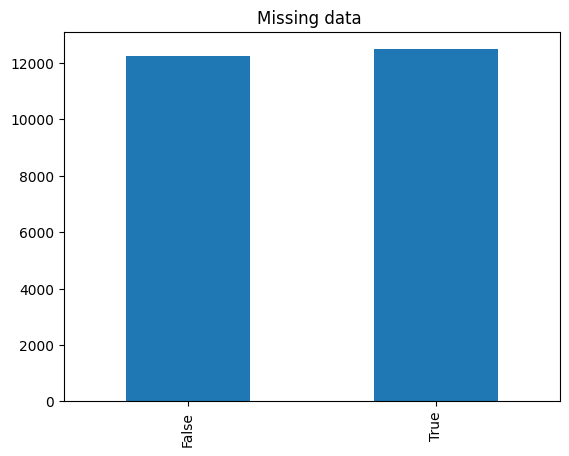

In [394]:
# Check for missing data in the specified features
missing_data = host[['host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate']].isnull().any(axis=1)

# Group the data based on whether there's missing data in any of these features
grouped_data = host.groupby(missing_data)['price'].mean().plot(kind='bar')
plt.title('Missing data ')
# Display the differences
print(grouped_data)


In [395]:
missing_data.value_counts()

False    2189
True      561
Name: count, dtype: int64

<h2>Host Reputation and Superhost Status Conclusion:</h2>
<ul>
<li>The correlation between the Host  and the Price seems relatively weak overall.</li>
<li>One notable exception is the strong relationship between 'host_response_time' and 'price', which appears to be linear and consistent across the data. This suggests that hosts with faster response times may command higher prices.</li>
<li>Regarding <b>superhost</b> status, our analysis indicates a modest difference in price between superhosts and regular hosts, with superhosts commanding slightly higher prices (approximately +4%). This could be attributed to the trust and reliability associated with superhost status, influencing guests' willingness to pay a premium.</li>
<li>An intriguing finding is that missing host data does not significantly impact price. Surprisingly, hosts with missing details tend to have slightly higher prices (+1.5%). This phenomenon may stem from various factors, such as hosts being new to the platform and experimenting with pricing strategies.</li>
</ul>


<h1>Chapter 2: Location Analysis</h1>

In [473]:
loc=df[['neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 
                   'city', 'state', 'zipcode', 'market', 'smart_location', 
                   'country_code', 'country', 'latitude', 'longitude', 'is_location_exact',
                   'host_location', 'host_neighbourhood','price']].copy()
loc

,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,host_location,host_neighbourhood,price
0,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,"Seattle, Washington, United States",Queen Anne,8500.0
1,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,"Seattle, Washington, United States",Queen Anne,15000.0
2,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.629724,-122.369483,t,"Seattle, Washington, United States",Queen Anne,97500.0
3,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.638473,-122.369279,t,"Seattle, Washington, United States",Queen Anne,10000.0
4,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.632918,-122.372471,t,"Seattle, Washington, United States",Queen Anne,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,Fremont,Fremont,Other neighborhoods,Seattle,WA,98107,Seattle,"Seattle, WA",US,United States,47.664295,-122.359170,t,US,Holly,35900.0
3814,Portage Bay,Portage Bay,Capitol Hill,Seattle,WA,98102,Seattle,"Seattle, WA",US,United States,47.649552,-122.318309,t,"Seattle, Washington, United States",Portage Bay,7900.0
3815,NaN,Rainier Beach,Rainier Valley,Seattle,WA,98178,Seattle,"Seattle, WA",US,United States,47.508453,-122.240607,f,US,NaN,9300.0
3816,NaN,Madison Park,Capitol Hill,Seattle,WA,98112,Seattle,"Seattle, WA",US,United States,47.632335,-122.275530,f,"Tacoma, Washington, United States",NaN,9900.0


In [474]:
#loc.profile_report()

In [475]:
loc.drop(columns=['city','state','market','country_code','country','smart_location','host_location','host_neighbourhood','neighbourhood'],axis=1,inplace=True)

In [476]:
loc

,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,latitude,longitude,is_location_exact,price
0,West Queen Anne,Queen Anne,98119,47.636289,-122.371025,t,8500.0
1,West Queen Anne,Queen Anne,98119,47.639123,-122.365666,t,15000.0
2,West Queen Anne,Queen Anne,98119,47.629724,-122.369483,t,97500.0
3,West Queen Anne,Queen Anne,98119,47.638473,-122.369279,t,10000.0
4,West Queen Anne,Queen Anne,98119,47.632918,-122.372471,t,45000.0
...,...,...,...,...,...,...,...
3813,Fremont,Other neighborhoods,98107,47.664295,-122.359170,t,35900.0
3814,Portage Bay,Capitol Hill,98102,47.649552,-122.318309,t,7900.0
3815,Rainier Beach,Rainier Valley,98178,47.508453,-122.240607,f,9300.0
3816,Madison Park,Capitol Hill,98112,47.632335,-122.275530,f,9900.0


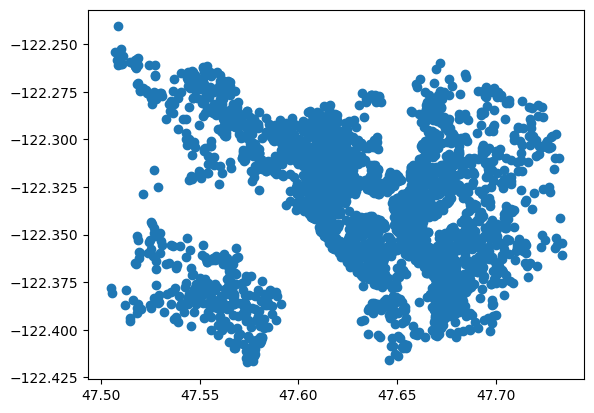

In [477]:
plt.scatter(y='longitude',x='latitude',data=loc)

In [478]:
loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   neighbourhood_cleansed        3818 non-null   object 
 1   neighbourhood_group_cleansed  3818 non-null   object 
 2   zipcode                       3811 non-null   object 
 3   latitude                      3818 non-null   float64
 4   longitude                     3818 non-null   float64
 5   is_location_exact             3818 non-null   object 
 6   price                         3818 non-null   float64
dtypes: float64(3), object(4)
memory usage: 208.9+ KB


In [479]:
loc.isna().sum()

neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
zipcode                         7
latitude                        0
longitude                       0
is_location_exact               0
price                           0
dtype: int64

In [480]:
loc['neighbourhood_cleansed'].value_counts()

neighbourhood_cleansed
Broadway             397
Belltown             234
Wallingford          167
Fremont              158
Minor                135
                    ... 
Arbor Heights          5
Pinehurst              4
South Beacon Hill      4
South Park             3
Roxhill                2
Name: count, Length: 87, dtype: int64

<Axes: xlabel='neighbourhood_cleansed'>

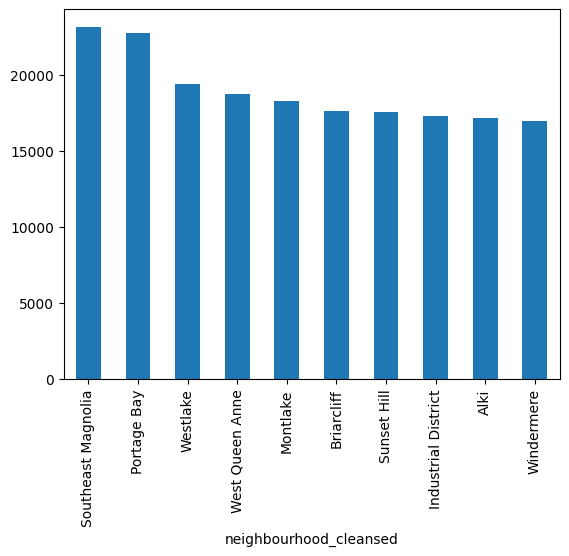

In [481]:
loc.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).head(10).plot(kind='bar')

In [482]:
loc.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).head(10).index

Index(['Southeast Magnolia', 'Portage Bay', 'Westlake', 'West Queen Anne',
       'Montlake', 'Briarcliff', 'Sunset Hill', 'Industrial District', 'Alki',
       'Windermere'],
      dtype='object', name='neighbourhood_cleansed')

<Axes: xlabel='zipcode'>

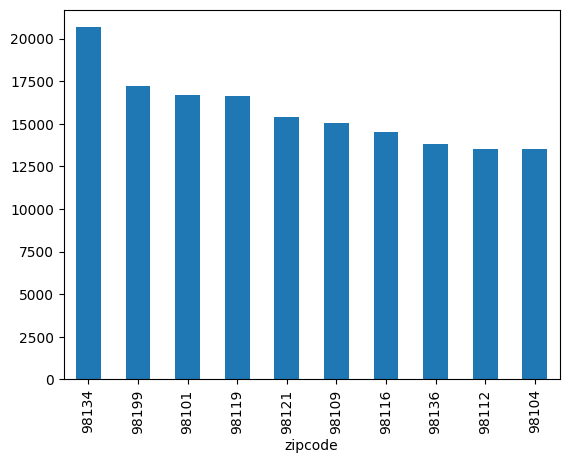

In [497]:
zipcodes_list=loc.groupby('zipcode')['price'].mean().sort_values(ascending=False).head(20)
loc.groupby('zipcode')['price'].mean().sort_values(ascending=False).head(10).plot(kind='bar')

In [498]:
zipcodes=zipcodes_list.index

In [499]:
zipcodes=zipcodes.to_list()

In [500]:
zipcodes

['98134',
 '98199',
 '98101',
 '98119',
 '98121',
 '98109',
 '98116',
 '98136',
 '98112',
 '98104',
 '98122',
 '98107',
 '98102',
 '98103',
 '98126',
 '98115',
 '98117',
 '98105',
 '98144',
 '98177']

In [501]:
import folium
from geopy.geocoders import Nominatim


# Initialize Nominatim geocoder
geolocator = Nominatim(user_agent="zipcode_locator")

# Create a map centered at Seattle
seattle_map = folium.Map(location=[47.6062, -122.3321], zoom_start=10)

# Add markers for each zip code
for zipcode in zipcodes:
    location = geolocator.geocode(zipcode)
    if location:
        folium.Marker(
            location=[location.latitude, location.longitude],
            popup="Zipcode: {}".format(zipcode)
        ).add_to(seattle_map)

# Display the map
seattle_map


In [502]:
loc

,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,latitude,longitude,is_location_exact,price
0,West Queen Anne,Queen Anne,98119,47.636289,-122.371025,True,8500.0
1,West Queen Anne,Queen Anne,98119,47.639123,-122.365666,True,15000.0
2,West Queen Anne,Queen Anne,98119,47.629724,-122.369483,True,97500.0
3,West Queen Anne,Queen Anne,98119,47.638473,-122.369279,True,10000.0
4,West Queen Anne,Queen Anne,98119,47.632918,-122.372471,True,45000.0
...,...,...,...,...,...,...,...
3813,Fremont,Other neighborhoods,98107,47.664295,-122.359170,True,35900.0
3814,Portage Bay,Capitol Hill,98102,47.649552,-122.318309,True,7900.0
3815,Rainier Beach,Rainier Valley,98178,47.508453,-122.240607,False,9300.0
3816,Madison Park,Capitol Hill,98112,47.632335,-122.275530,False,9900.0


In [489]:
loc['is_location_exact'].value_counts()

is_location_exact
t    3412
f     406
Name: count, dtype: int64

In [503]:
loc['is_location_exact']=loc['is_location_exact'].str.replace('t','True').str.replace('f','False')

In [504]:
loc['is_location_exact'].value_counts()

is_location_exact
True     3412
False     406
Name: count, dtype: int64

<Axes: xlabel='is_location_exact'>

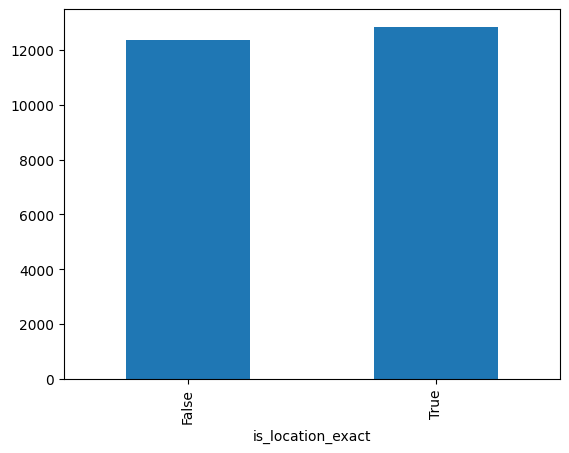

In [505]:
loc.groupby('is_location_exact')['price'].mean().plot(kind='bar')


In [506]:
# Calculate the mean price for each group
mean_prices = loc.groupby('is_location_exact')['price'].mean()

# Calculate the difference in mean prices
price_difference = (mean_prices['True'] - mean_prices['False'])/mean_prices['True']*100

# Display the difference
print("Difference in mean prices:", price_difference)



Difference in mean prices: 3.65835354975126


<h1>Conclusion Location Analysis</h1>

<li><b>Geographical Advantage:</b> Properties with geographical advantages, such as waterfront views, proximity to parks and tourist attractions tend to command higher prices. </li>

<li><b>Precision in Location:</b> Our analysis indicates that properties with precise location details fetch a premium (+3.65%) compared to those with approximate or uncertain location information. Visitors often prioritize accuracy and certainty in location, which translates into a higher willingness to pay. </li>

<li><b>Accessibility and Convenience:</b> Proximity to essential amenities, transportation hubs, and major thoroughfares positively impacts property prices. </li>

